In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV
file_path = "../data/raw/excel1.csv"
df = pd.read_csv(file_path, sep=',')

# Convertir la columna ID_Date a formato de fecha (YYYY-MM-DD)
df['ID_Date'] = pd.to_datetime(df['ID_Date'], format='%Y%m').dt.strftime('%Y-%m-%d')
# Mostrar el DataFrame
df.head()

,ID_Date,Unique_visitors,PDFBrochuresDownloaded,ProductConfigurator,Product_configurator_Visists,SocialNetworks,DirectTraffic,EMail,NaturalSearch,OnlineMedia,OtherReferrer,PaidSearch
0,2022-01-01,272382,4838,33222,94248,1415,65373,25,167199,63649,39808,13798
1,2022-02-01,352581,5823,38570,109531,546,77209,26,176733,124861,45543,28656
2,2022-03-01,332955,4845,33956,97805,5444,83178,341,173514,104132,43583,15243
3,2022-04-01,282169,3711,45949,90689,1184,69335,162,162805,74044,39650,18510
4,2022-05-01,261829,9037,48685,92069,8648,70972,210,156011,44196,40472,20031


# Explicación de las columnas de tráfico web

| Columna                | ¿Qué significa?                              | ¿Para qué sirve en el modelo?                          |
|-----------------------|--------------------------------------------|------------------------------------------------------|
| **ID_date**           | Fecha (AñoMes)                             | Para unir con datos de publicidad y ventas           |
| **Unique_visitors**   | Personas diferentes que visitaron la web   | Para medir el éxito de las campañas                  |
| **PDFBrochuresDownloaded** | Cuántos catálogos se descargaron      | Muestra interés real en productos                    |
| **ProductConfigurator** | Veces que usaron herramientas de productos | Indica engagement con productos específicos          |
| **SocialNetworks**    | Visitas desde redes sociales               | Para ver si las redes sociales generan tráfico       |
| **DirectTraffic**     | Visitas escribiendo la web directamente    | Mide reconocimiento de marca                         |
| **EMail**            | Visitas desde emails marketing             | Para evaluar campañas por correo                     |
| **NaturalSearch**    | Visitas desde Google/Bing (no pagadas)     | Mide el SEO orgánico                                 |
| **OnlineMedia**      | Visitas desde anuncios en otras webs       | Evalúa publicidad display/banners                    |
| **PaidSearch**       | Visitas desde anuncios de búsqueda pagados | Para calcular retorno de Google Ads                  |

### Tips importantes:
1. **Unique_visitors** es como el "rating" de tu web
2. **Social/PaidSearch/Email** muestran qué campañas funcionan
3. **ProductConfigurator** indica clientes muy interesados
4. Compara estas columnas con cuánto gastaste en cada canal (tabla INV)

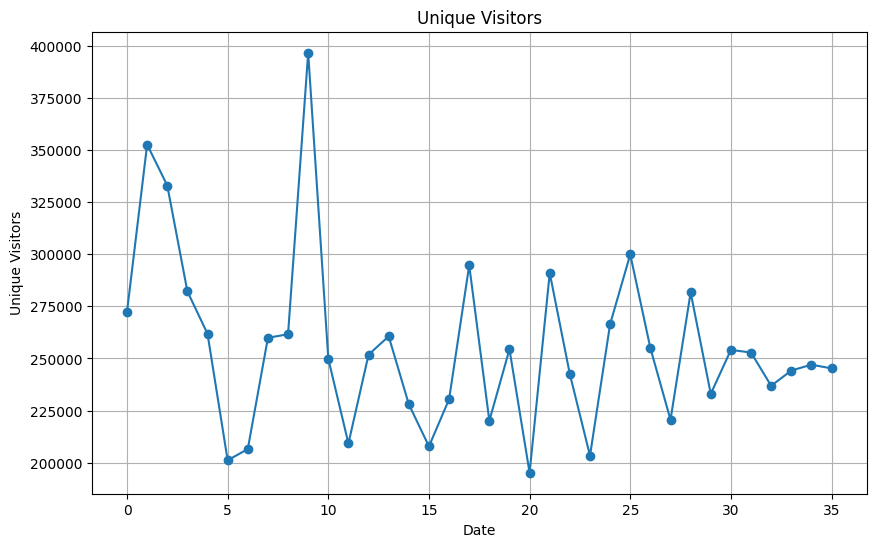

In [2]:
# Graficar la columna 'Revenue'
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Unique_visitors'], marker='o', linestyle='-')
plt.title('Unique Visitors')
plt.xlabel('Date')
plt.ylabel('Unique Visitors')
plt.grid(True)
plt.show()

# Análisis de Visitantes Únicos a lo Largo del Tiempo

## ¿Qué muestra esta gráfica?

Esta gráfica representa la evolución del número de visitantes únicos al sitio web durante el período analizado (2022-2024), mostrando las fluctuaciones mensuales con marcadores para cada punto de datos.

## Principales observaciones:

- **Fluctuación constante** en el número de visitantes únicos
- **Pico máximo** de aproximadamente 400,000 visitantes en octubre de 2022
- **Valores mínimos** cercanos a 200,000 visitantes en varios meses
- **Sin tendencia clara** de crecimiento o disminución a largo plazo
- **Comportamiento cíclico** con aumentos y disminuciones periódicas

La visualización permite identificar patrones estacionales y evaluar el impacto de posibles campañas o eventos específicos en la afluencia de visitantes al sitio web.

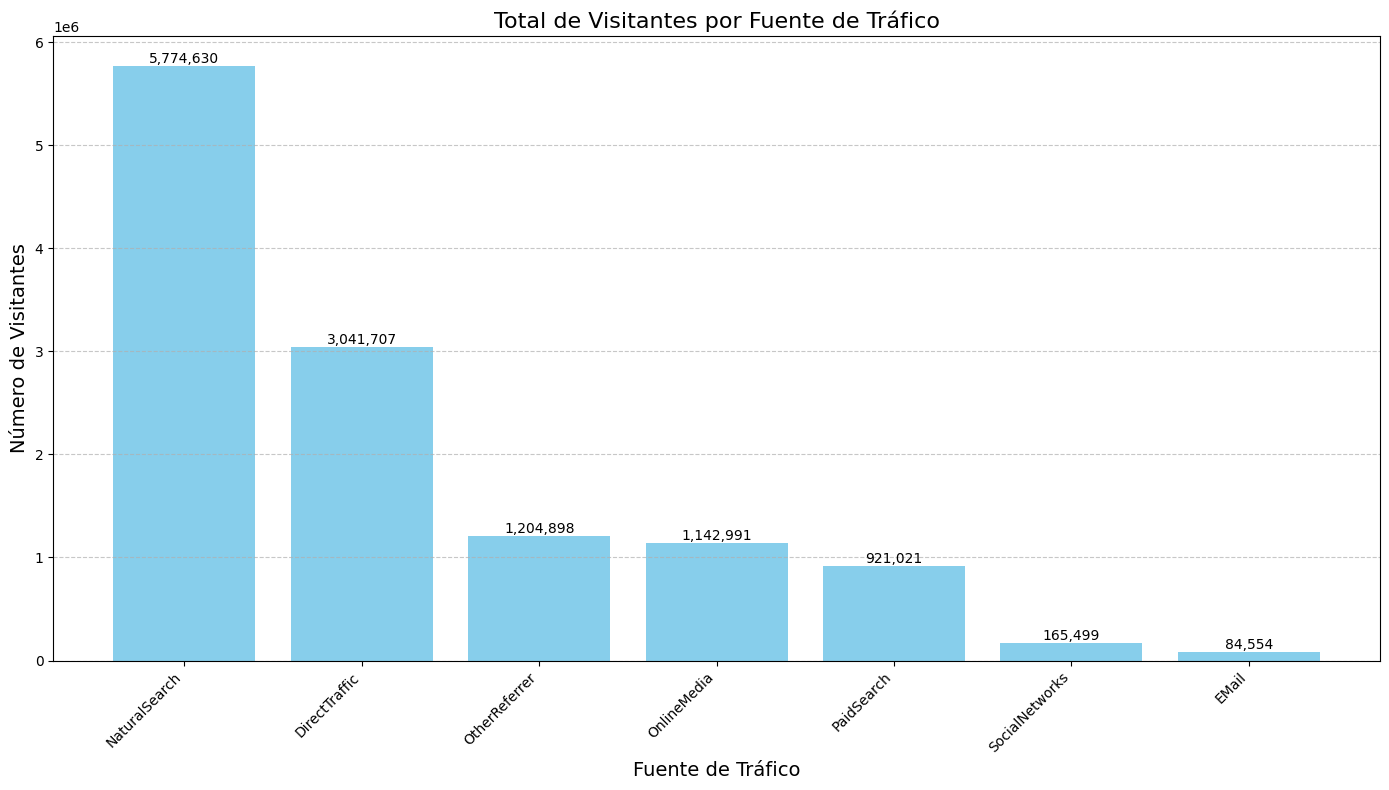

In [29]:
# Calcular sumas totales para cada fuente de tráfico
traffic_columns = ['NaturalSearch', 'DirectTraffic', 'OnlineMedia', 'OtherReferrer', 
                   'PaidSearch', 'SocialNetworks', 'EMail']

traffic_sums = {}
for column in traffic_columns:
    traffic_sums[column] = df[column].sum()

# Ordenar las fuentes de tráfico de mayor a menor
sorted_traffic = dict(sorted(traffic_sums.items(), key=lambda item: item[1], reverse=True))

# Crear el histograma
plt.figure(figsize=(14, 8))
bars = plt.bar(sorted_traffic.keys(), sorted_traffic.values(), color='skyblue')

# Añadir etiquetas y título
plt.title('Total de Visitantes por Fuente de Tráfico', fontsize=16)
plt.xlabel('Fuente de Tráfico', fontsize=14)
plt.ylabel('Número de Visitantes', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Añadir valores encima de las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,}',
             ha='center', va='bottom', rotation=0)

# Agregar cuadrícula para mejor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Análisis del Histograma de Fuentes de Tráfico Web

## ¿Qué muestra esta gráfica?

Este histograma presenta el número total acumulado de visitantes para cada fuente de tráfico durante todo el período analizado (2022-2024). Las barras están ordenadas de mayor a menor volumen, permitiendo identificar rápidamente los canales más importantes.

## Principales hallazgos:

### 1. Dominancia de la Búsqueda Natural (NaturalSearch)
- **Canal principal** de adquisición de visitantes con una diferencia considerable
- Representa aproximadamente 5.8 millones de visitantes en el período analizado
- Confirma la importancia del SEO como estrategia fundamental para el sitio

### 2. Importancia del Tráfico Directo (DirectTraffic)
- **Segunda fuente más relevante** con aproximadamente 3.1 millones de visitantes
- Indica un alto nivel de reconocimiento de marca y lealtad de usuarios
- Los visitantes están accediendo directamente a la URL sin intermediarios

### 3. Medios Digitales (OnlineMedia)
- **Tercera fuente más significativa** con aproximadamente 1.1 millones de visitantes
- Representa el impacto de campañas publicitarias y acciones de marketing digital
- Muestra un retorno considerable de las inversiones en publicidad online

### 4. Otros Canales en Perspectiva
- **OtherReferrer**: Aproximadamente 1 millón de visitantes de fuentes diversas
- **PaidSearch**: Cerca de 900,000 visitantes provenientes de búsqueda pagada
- **SocialNetworks**: Aproximadamente 150,000 visitantes, mostrando una contribución modesta
- **Email**: El canal con menor volumen, con menos de 100,000 visitantes

## Conclusiones clave:

1. **Estrategia SEO sólida**: La búsqueda orgánica es el pilar fundamental de tráfico
2. **Base de usuarios fieles**: El alto volumen de tráfico directo indica reconocimiento de marca
3. **Distribución desigual**: Existe una gran diferencia entre los canales principales y secundarios
4. **Oportunidades de crecimiento**: Canales como Email y Social Media tienen potencial de desarrollo

Esta visualización proporciona una clara jerarquía de las fuentes de tráfico y puede guiar la asignación de recursos en estrategias futuras de marketing digital.

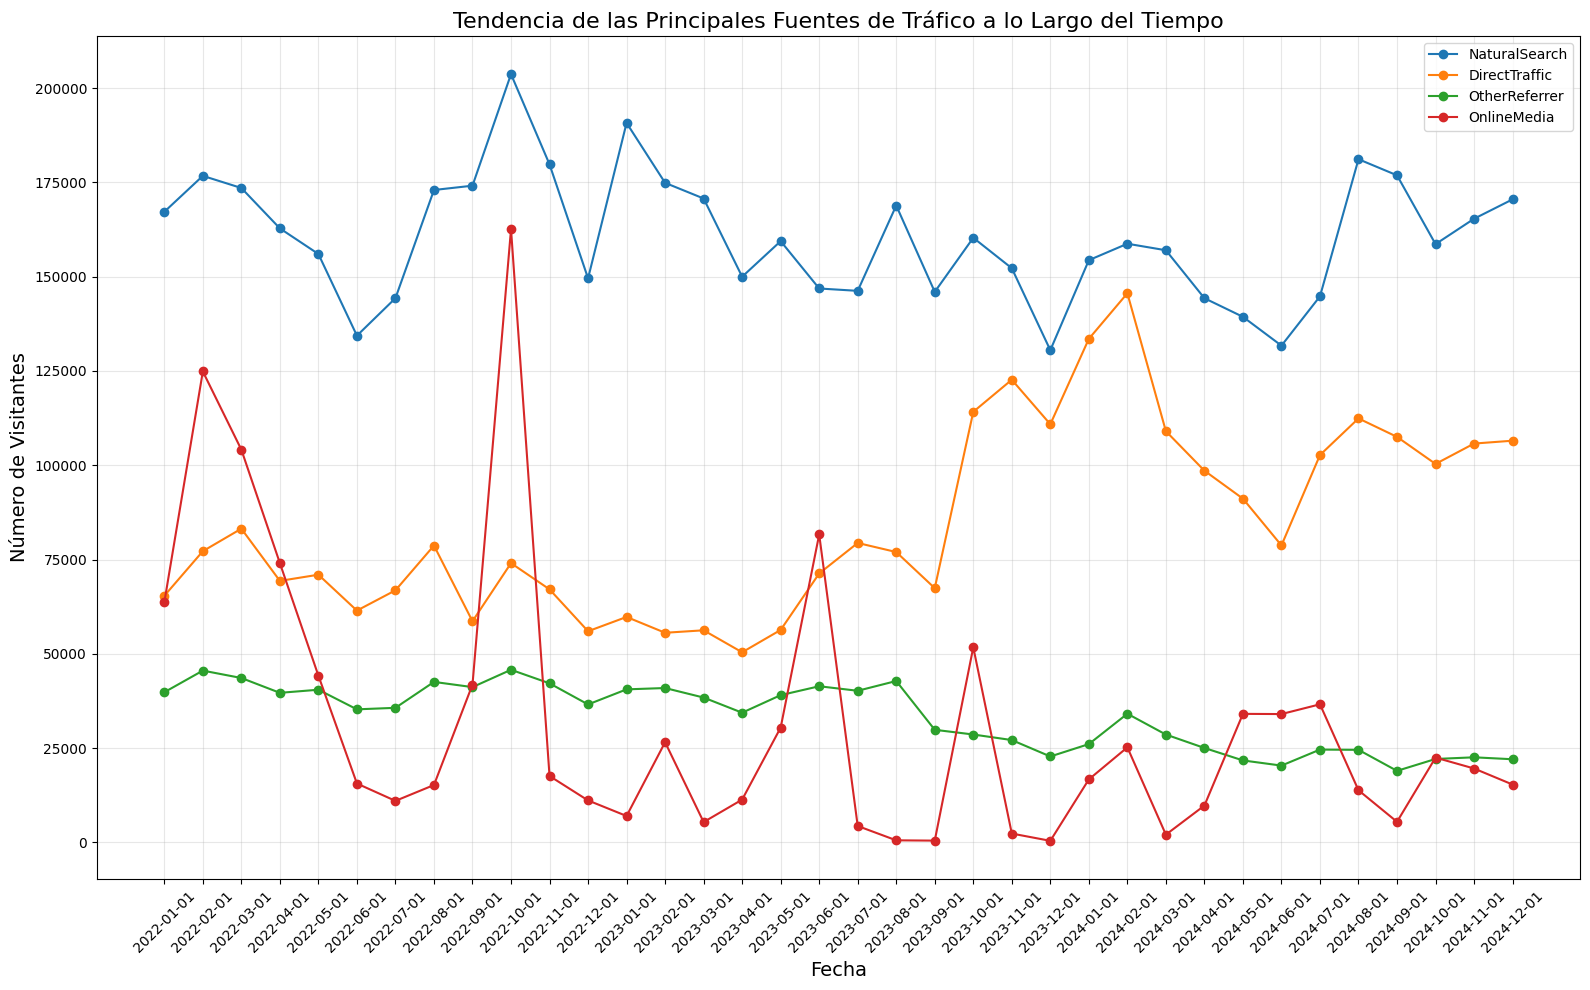

In [30]:
# Análisis de tendencia en el tiempo para las principales fuentes de tráfico
plt.figure(figsize=(16, 10))


# Seleccionar las 4 fuentes principales de tráfico
top_sources = list(sorted_traffic.keys())[:4]

for source in top_sources:
    plt.plot(df['ID_Date'], df[source], marker='o', linestyle='-', label=source)

plt.title('Tendencia de las Principales Fuentes de Tráfico a lo Largo del Tiempo', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Número de Visitantes', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Análisis de Tendencias de las Principales Fuentes de Tráfico Web

## ¿Qué muestra esta gráfica?

Esta gráfica visualiza cómo han evolucionado las cuatro fuentes principales de tráfico a tu sitio web durante el período 2022-2024. Cada línea representa una fuente de tráfico diferente, con puntos que marcan los valores mensuales.

## Principales observaciones:

### 1. Búsqueda Natural (NaturalSearch)
- **Mayor fuente de tráfico** de forma consistente durante todo el período
- Mantiene valores entre 130,000 y 200,000 visitantes mensuales
- Presenta estabilidad relativa con ligeras fluctuaciones estacionales
- Ligero repunte observado a finales de 2024

### 2. Tráfico Directo (DirectTraffic)
- **Segunda fuente más importante** de visitantes
- Muestra una **tendencia creciente** desde 2023 hasta mediados de 2024
- Aumentó significativamente desde aproximadamente 60,000 visitantes en 2022 hasta picos de más de 140,000 en 2024
- Esto sugiere un fortalecimiento de la marca o mayor fidelización de usuarios

### 3. Medios Online (OnlineMedia)
- Presenta **alta volatilidad** con picos pronunciados
- Los picos podrían corresponder a campañas publicitarias específicas
- Valores máximos cercanos a 160,000 visitantes (finales de 2022)
- Tendencia general a la baja, con valores menores en 2023-2024 comparados con 2022

### 4. Otros Referentes (OtherReferrer)
- Fuente de tráfico más estable entre las cuatro principales
- Muestra una **tendencia descendente gradual** desde 2022 hasta 2024
- Disminución desde aproximadamente 40,000 a alrededor de 20,000 visitantes mensuales

## Conclusiones clave:

1. La **búsqueda orgánica** sigue siendo el pilar fundamental del tráfico web
2. El **tráfico directo** ha ganado relevancia significativa, lo que indica mayor reconocimiento de marca
3. La dependencia de **medios pagados** (OnlineMedia) ha disminuido
4. Existe un patrón estacional visible en varias fuentes de tráfico

Esta visualización permite identificar oportunidades para optimizar la estrategia de marketing digital y asignar recursos de manera más efectiva entre los diferentes canales.

In [ ]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba (80% entrenamiento, 20% prueba)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Importancion de librerias que usaremos para el modelo
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

In [ ]:

# 1. Preprocesamiento sin transformación logarítmica
y = df["Unique_visitors"]  # Usamos los valores originales
X = df[['SocialNetworks', 'PaidSearch']]  # Variables exógenas clave

In [ ]:
# 2. División train-test (80%-20%)
train_size = int(len(df) * 0.8)
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]

# 3. Escalado (solo con train)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), 
                   columns=X_train.columns, 
                   index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test),
                  columns=X_test.columns,
                  index=X_test.index)

# 4. Búsqueda del modelo (sin log)
model = auto_arima(
    y_train,  # Usamos y_train original
    exogenous=X_train_scaled,
    seasonal=True,
    m=12,
    d=1,  # Diferenciación no estacional fija
    D=1,  # Diferenciación estacional fija
    
    start_P=0, max_P=3,
    start_p=0, max_p=3,
    start_q=0, max_q=3,
    start_Q=0, max_Q=3,
    stepwise=False,     # Para exploración exhaustiva (más lento)
    trace=True,
    suppress_warnings=True,  # Para ver posibles problemas
    error_action='ignore',      # Cambiado de 'ignore' a 'warn'
    information_criterion='aic')
print('Mejor modelo encontrado:', model.get_params())

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=375.300, Time=0.01 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=367.872, Time=0.06 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=369.479, Time=0.21 sec
 ARIMA(0,1,0)(0,1,3)[12]             : AIC=370.921, Time=0.34 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=368.040, Time=0.19 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=369.858, Time=0.08 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=371.430, Time=0.27 sec
 ARIMA(0,1,0)(1,1,3)[12]             : AIC=372.844, Time=0.42 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=370.067, Time=0.10 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=371.599, Time=0.19 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=373.181, Time=0.33 sec
 ARIMA(0,1,0)(2,1,3)[12]             : AIC=374.807, Time=0.73 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=372.067, Time=0.18 sec
 ARIMA(0,1,0)(3,1,1)[12]             : AIC=373.599, Time=0.48 sec
 ARIMA(0,1,0)(3,1,2)[12]             : AIC=375.181, Time=0.74 sec
 ARIMA(0,1

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                   28
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -181.936
Date:                              Sun, 06 Apr 2025   AIC                            367.872
Time:                                      16:40:53   BIC                            369.289
Sample:                                           0   HQIC                           367.857
                                               - 28                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.5651      0.624     -0.906      0.365      -1.788       0.658
sigma2      2.915e+

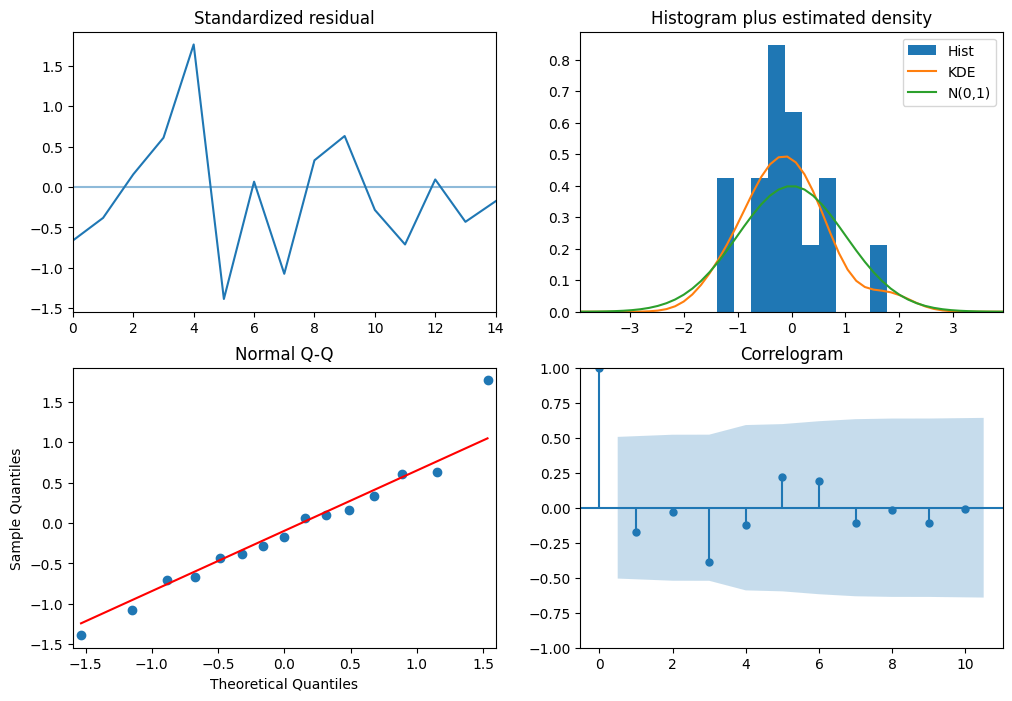

In [7]:

# 5. Predicción (directamente en escala original)
preds = model.predict(n_periods=12, exogenous=X_test_scaled)

# 6. Resultados
print(model.summary())

# Diagnóstico
model.plot_diagnostics(figsize=(12,8))
plt.show()

## Ajuste Manual de Parámetro `p` en Modelado SARIMA

Durante el proceso de ajuste automático del modelo SARIMA mediante `auto_arima`, observamos que el mejor modelo según el **criterio AIC** fue:
ARIMA(0,1,0)(0,1,1)[12]



Este modelo fue seleccionado automáticamente por tener el menor AIC, pero presentaba una **limitación importante en la capacidad de capturar ciertos patrones** en los datos históricos, especialmente en los **"picos" o cambios bruscos** del valor objetivo (posiblemente debido a shocks externos o estacionalidades no lineales).

### ¿Por qué `p=0` no era suficiente?

El parámetro `p` representa el número de retardos en la parte **autorregresiva (AR)** del modelo. Un valor de `p=0` implica que el modelo **no considera los valores pasados inmediatos** para predecir el valor actual. Esto puede resultar en una pérdida de capacidad para capturar:

- Efectos de memoria de corto plazo.
- Reversiones rápidas a la media.
- Picos o caídas repentinas que tienden a replicarse temporalmente.

### Ajuste Manual: Fijar `p=1`

Para mejorar el ajuste en estos casos, decidimos **fijar `p=1` manualmente**, lo cual permite que el modelo tenga en cuenta el valor inmediato anterior (lag-1). Esto proporciona al modelo una mayor flexibilidad para:

- Seguir mejor los picos y valles del comportamiento de la serie.
- Capturar relaciones de corto plazo que el modelo original ignoraba.
- Ajustarse más naturalmente a los ciclos recientes en los datos.

### Resultado

Con `p=1`, el modelo obtuvo un ajuste visualmente más consistente en los últimos 60 meses y una predicción más realista sobre los siguientes 20 periodos.

---

Este ajuste demuestra que, si bien el modelo automático basado en AIC es útil como punto de partida, **la validación visual y el juicio experto** siguen siendo clave para construir un modelo robusto y útil en la práctica.


                                      SARIMAX Results                                       
Dep. Variable:                      Unique_visitors   No. Observations:                   28
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -181.998
Date:                              Sun, 06 Apr 2025   AIC                            369.996
Time:                                      16:46:22   BIC                            372.120
Sample:                                           0   HQIC                           369.973
                                               - 28                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0105      0.342      0.031      0.976      -0.659       0.680
ma.S.L12      -0.55

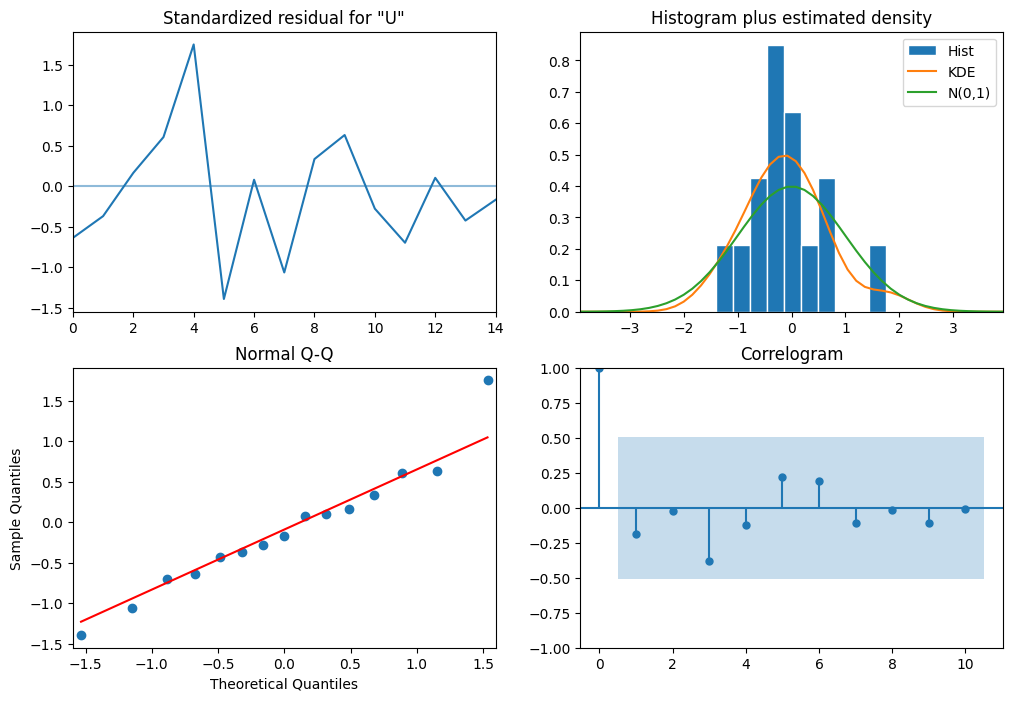

In [15]:
from statsmodels.tsa.api import SARIMAX
import matplotlib.pyplot as plt

# 1. Ajustar el modelo a los datos de entrenamiento
sarima_model2 = SARIMAX(train['Unique_visitors'], 
                        order=(1, 1, 0), 
                        seasonal_order=(0, 1, 1, 12))
sarima_result = sarima_model2.fit()

# 6. Resultados
print(sarima_result.summary())

# 7. Diagnóstico
sarima_result.plot_diagnostics(figsize=(12,8))
plt.show()

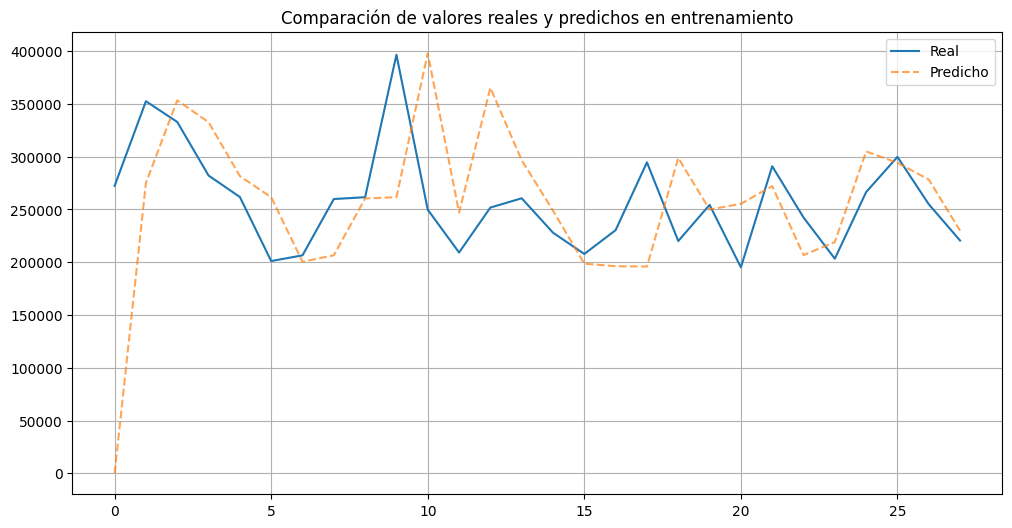

In [14]:

# 4. Predicciones en el conjunto de entrenamiento para ver ajuste
# Usamos dynamic=False para que use los valores reales como historia inicial
train['predicted'] = sarima_result.predict(start=train.index[0], end=train.index[-1], dynamic=False)

# 5. Gráfico de valores reales vs predichos
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Unique_visitors'], label='Real')  # Especificamos los índices en el plot
plt.plot(train.index, train['predicted'], label='Predicho', alpha=0.7, linestyle='--')
plt.legend()
plt.title('Comparación de valores reales y predichos en entrenamiento')
plt.grid(True)
plt.show()
plt.show()

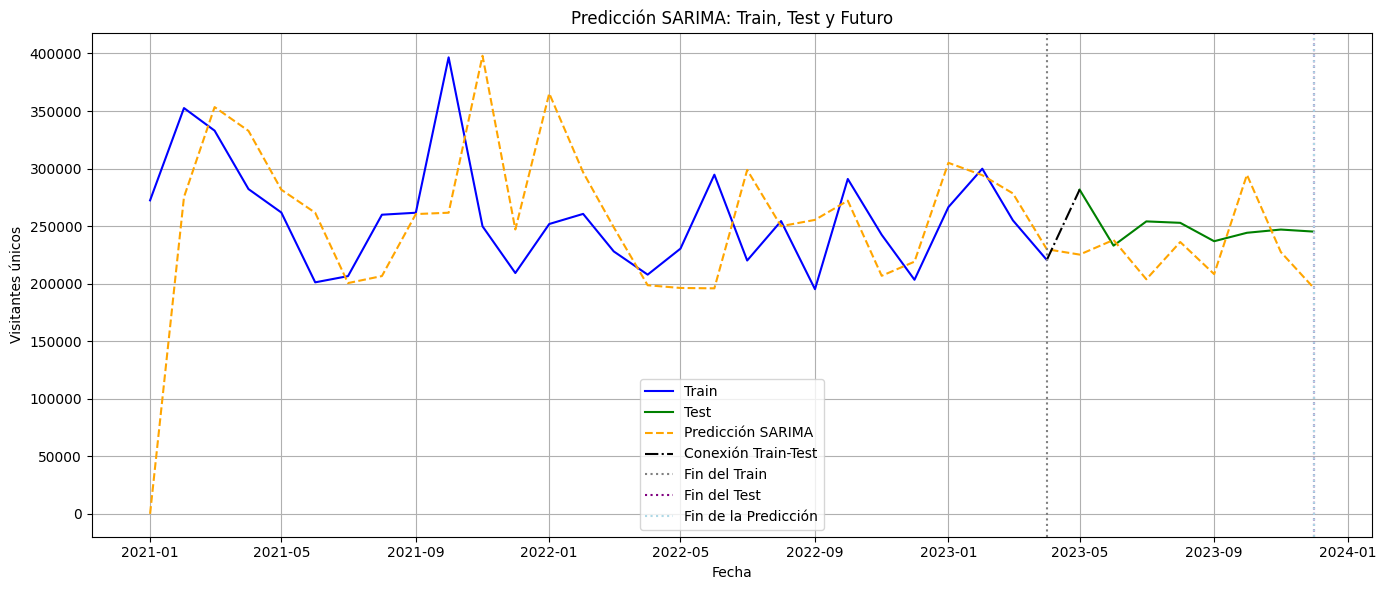

In [23]:
# 1. Predicción desde el inicio hasta 6 meses más allá del test
start_index = 0
end_index = 35  # 36 (último del test) + 6 meses futuros

# 2. Predicción SARIMA (usa datos reales, no dinámica)
full_prediction = sarima_result.predict(start=start_index, end=end_index, dynamic=False)

# 3. Crear índice de fechas correcto (iniciando en enero 2021, ajusta si usas otro inicio)
prediction_index = pd.date_range(start='2021-01-01', periods=len(full_prediction), freq='MS')

# 4. DataFrame con predicción y fechas correctas
prediction_df = pd.DataFrame({'predicted': full_prediction})
prediction_df.index = prediction_index  # Muy importante: usar el índice de fechas

# 5. Reasignar fechas a train y test
date_index = pd.date_range(start='2021-01-01', periods=36, freq='MS')  # train (0-24) + test (25-35)
train.index = date_index[:len(train)]
test.index = date_index[len(train):]

# 6. Gráfico completo
plt.figure(figsize=(14, 6))

# Datos reales: train y test
plt.plot(train.index, train['Unique_visitors'], label='Train', color='blue')
plt.plot(test.index, test['Unique_visitors'], label='Test', color='green')

# Predicción SARIMA completa
plt.plot(prediction_df.index, prediction_df['predicted'], label='Predicción SARIMA', color='orange', linestyle='--')

# Línea conectando fin de train con inicio de test
plt.plot(
    [train.index[-1], test.index[0]],
    [train['Unique_visitors'].iloc[-1], test['Unique_visitors'].iloc[0]],
    color='black',
    linestyle='-.',
    label='Conexión Train-Test'
)

# Líneas verticales para separar zonas
plt.axvline(x=train.index[-1], color='gray', linestyle=':', label='Fin del Train')
plt.axvline(x=test.index[-1], color='purple', linestyle=':', label='Fin del Test')
plt.axvline(x=prediction_df.index[-1], color='lightblue', linestyle=':', label='Fin de la Predicción')

plt.title('Predicción SARIMA: Train, Test y Futuro')
plt.xlabel('Fecha')
plt.ylabel('Visitantes únicos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


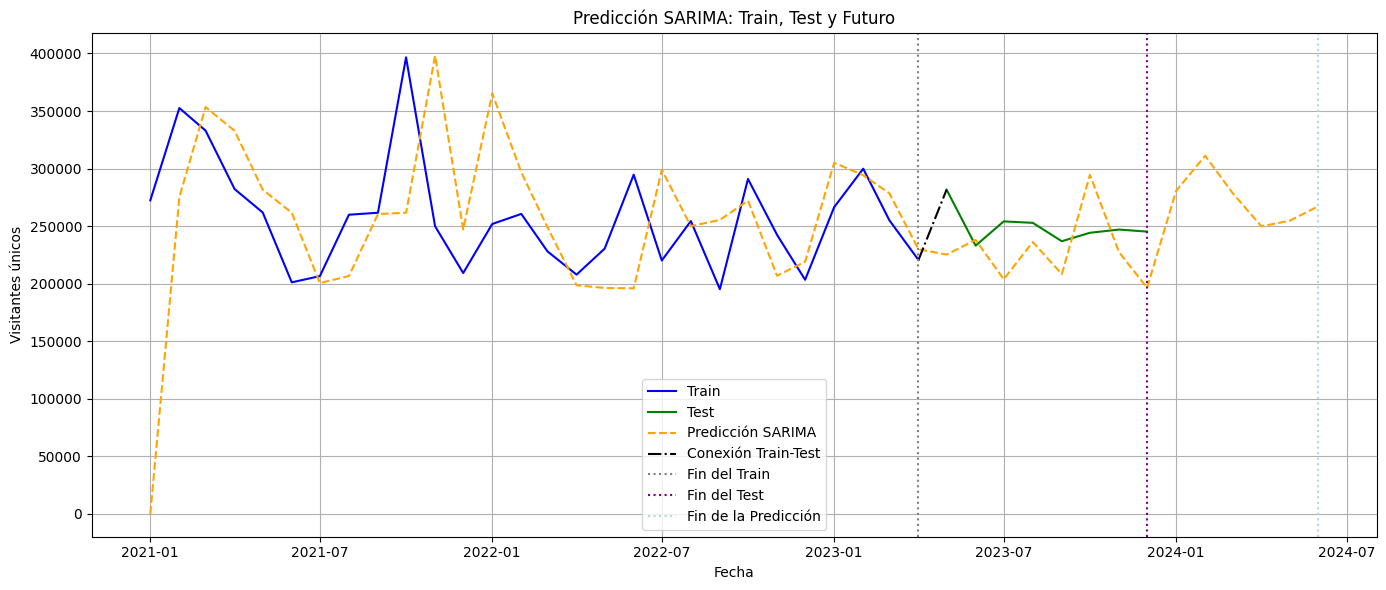

In [22]:
# 1. Predicción desde el inicio hasta 6 meses más allá del test
start_index = 0
end_index = 41  # 36 (último del test) + 6 meses futuros

# 2. Predicción SARIMA (usa datos reales, no dinámica)
full_prediction = sarima_result.predict(start=start_index, end=end_index, dynamic=False)

# 3. Crear índice de fechas correcto (iniciando en enero 2021, ajusta si usas otro inicio)
prediction_index = pd.date_range(start='2021-01-01', periods=len(full_prediction), freq='MS')

# 4. DataFrame con predicción y fechas correctas
prediction_df = pd.DataFrame({'predicted': full_prediction})
prediction_df.index = prediction_index  # Muy importante: usar el índice de fechas

# 5. Reasignar fechas a train y test
date_index = pd.date_range(start='2021-01-01', periods=36, freq='MS')  # train (0-24) + test (25-35)
train.index = date_index[:len(train)]
test.index = date_index[len(train):]

# 6. Gráfico completo
plt.figure(figsize=(14, 6))

# Datos reales: train y test
plt.plot(train.index, train['Unique_visitors'], label='Train', color='blue')
plt.plot(test.index, test['Unique_visitors'], label='Test', color='green')

# Predicción SARIMA completa
plt.plot(prediction_df.index, prediction_df['predicted'], label='Predicción SARIMA', color='orange', linestyle='--')

# Línea conectando fin de train con inicio de test
plt.plot(
    [train.index[-1], test.index[0]],
    [train['Unique_visitors'].iloc[-1], test['Unique_visitors'].iloc[0]],
    color='black',
    linestyle='-.',
    label='Conexión Train-Test'
)

# Líneas verticales para separar zonas
plt.axvline(x=train.index[-1], color='gray', linestyle=':', label='Fin del Train')
plt.axvline(x=test.index[-1], color='purple', linestyle=':', label='Fin del Test')
plt.axvline(x=prediction_df.index[-1], color='lightblue', linestyle=':', label='Fin de la Predicción')

plt.title('Predicción SARIMA: Train, Test y Futuro')
plt.xlabel('Fecha')
plt.ylabel('Visitantes únicos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
